#펀딩피 노림형 탐지

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/싱가포르/data/Trade.csv')
display(df.head())

,account_id,ts,symbol,side,openclose,position_id,leverage,price,qty,amount
0,A_c668740478,2025-03-01 00:04:14.329767,BTCUSDT.PERP,LONG,OPEN,P_9ecd54214c,50,84303.5,0.177839,14992.450136
1,A_c668740478,2025-03-01 00:09:08.199617,BTCUSDT.PERP,LONG,CLOSE,P_9ecd54214c,0,84321.0,0.177839,14995.562319
2,A_7e27164ab6,2025-03-01 00:23:25.371503,BTCUSDT.PERP,LONG,OPEN,P_fbe21fd2c4,2,84369.2,0.002787,235.136960
3,A_c668740478,2025-03-01 00:30:03.218306,BTCUSDT.PERP,LONG,OPEN,P_9567d3d1d3,50,84243.3,0.178533,15040.209079
4,A_c668740478,2025-03-01 00:34:38.392647,BTCUSDT.PERP,LONG,CLOSE,P_9567d3d1d3,0,84121.0,0.178533,15018.374493


In [4]:
import os
import pandas as pd

data_dir = '/content/drive/MyDrive/싱가포르/data/'

# Dictionary to store DataFrames
data = {}

# List all files in the directory
if os.path.exists(data_dir):
    for filename in os.listdir(data_dir):
        if filename.endswith('.csv'):
            filepath = os.path.join(data_dir, filename)
            df_name = os.path.splitext(filename)[0] # Use filename without extension as key
            print(f"Loading {filename}...")
            try:
                data[df_name] = pd.read_csv(filepath)
                print(f"Successfully loaded '{df_name}'. First 5 rows:")
                display(data[df_name].head())
                print("\n" + "-"*30 + "\n") # Separator for better readability
            except Exception as e:
                print(f"Error loading {filename}: {e}")
else:
    print(f"Directory not found: {data_dir}")

# You can access your DataFrames like this:
# 예를 들어, 'my_data.csv'가 있다면 data['my_data']로 접근합니다.
# print(data.keys()) # To see all loaded DataFrame names

Loading Reward.csv...
Successfully loaded 'Reward'. First 5 rows:


,account_id,ts,reward_amount
0,A_f96ede8d34,2025-01-02 08:14:06.194179,6.843929
1,A_f96ede8d34,2025-01-02 08:14:06.241981,6.938105
2,A_2db64f326b,2025-01-02 08:15:13.284073,6.843929
3,A_2db64f326b,2025-01-02 08:15:13.381792,6.938105
4,A_f96ede8d34,2025-01-03 07:32:10.198387,7.036313



------------------------------

Loading Funding.csv...
Successfully loaded 'Funding'. First 5 rows:


,account_id,ts,fee_rate,funding_fee
0,A_06d5bd3da9,2025-03-01 00:00:00.348937,0.000050,0.000063
1,A_06d5bd3da9,2025-03-01 00:00:00.348937,0.000050,0.000063
2,A_40cfe40ac2,2025-03-01 00:00:00.806171,0.000100,-0.065085
3,A_7e27164ab6,2025-03-01 00:00:00.889929,0.000022,0.000403
4,A_ebdb869fd3,2025-03-01 00:00:00.889929,0.000022,0.000037



------------------------------

Loading Trade.csv...
Successfully loaded 'Trade'. First 5 rows:


,account_id,ts,symbol,side,openclose,position_id,leverage,price,qty,amount
0,A_c668740478,2025-03-01 00:04:14.329767,BTCUSDT.PERP,LONG,OPEN,P_9ecd54214c,50,84303.5,0.177839,14992.450136
1,A_c668740478,2025-03-01 00:09:08.199617,BTCUSDT.PERP,LONG,CLOSE,P_9ecd54214c,0,84321.0,0.177839,14995.562319
2,A_7e27164ab6,2025-03-01 00:23:25.371503,BTCUSDT.PERP,LONG,OPEN,P_fbe21fd2c4,2,84369.2,0.002787,235.136960
3,A_c668740478,2025-03-01 00:30:03.218306,BTCUSDT.PERP,LONG,OPEN,P_9567d3d1d3,50,84243.3,0.178533,15040.209079
4,A_c668740478,2025-03-01 00:34:38.392647,BTCUSDT.PERP,LONG,CLOSE,P_9567d3d1d3,0,84121.0,0.178533,15018.374493



------------------------------

Loading IP.csv...
Successfully loaded 'IP'. First 5 rows:


,account_id,ip
0,A_1f97e16953,100.222.49.58
1,A_946b028740,18.96.95.89
2,A_78e950c1a2,13.120.90.27
3,A_0e72128b0d,190.83.18.146
4,A_0ad0445c5a,11.179.9.226



------------------------------

Loading Spec.csv...
Successfully loaded 'Spec'. First 5 rows:


,symbol,day,funding_interval,max_order_amount
0,IMXUSDT.PERP,2025-03-01 00:00:00.000000,4,75000.0
1,MOVEUSDT.PERP,2025-03-01 00:00:00.000000,4,75000.0
2,SXPUSDT.PERP,2025-03-01 00:00:00.000000,8,75000.0
3,PONKEUSDT.PERP,2025-03-01 00:00:00.000000,4,20000.0
4,KDAUSDT.PERP,2025-03-01 00:00:00.000000,4,20000.0



------------------------------



In [5]:
for df_name, df in data.items():
    if df_name != 'Spec':
        if 'account_id' in df.columns:
            print(f"Setting 'account_id' as index for '{df_name}' DataFrame...")
            data[df_name] = df.set_index('account_id')
            print(f"Updated '{df_name}' DataFrame. First 5 rows with new index:")
            display(data[df_name].head())
            print("\n" + "-"*30 + "\n")
        else:
            print(f"Warning: 'account_id' column not found in '{df_name}' DataFrame. Skipping index setting.")
    else:
        print(f"Skipping 'Spec' DataFrame as requested. First 5 rows:")
        display(data[df_name].head())
        print("\n" + "-"*30 + "\n")

Setting 'account_id' as index for 'Reward' DataFrame...
Updated 'Reward' DataFrame. First 5 rows with new index:


,ts,reward_amount
account_id,,
A_f96ede8d34,2025-01-02 08:14:06.194179,6.843929
A_f96ede8d34,2025-01-02 08:14:06.241981,6.938105
A_2db64f326b,2025-01-02 08:15:13.284073,6.843929
A_2db64f326b,2025-01-02 08:15:13.381792,6.938105
A_f96ede8d34,2025-01-03 07:32:10.198387,7.036313



------------------------------

Setting 'account_id' as index for 'Funding' DataFrame...
Updated 'Funding' DataFrame. First 5 rows with new index:


,ts,fee_rate,funding_fee
account_id,,,
A_06d5bd3da9,2025-03-01 00:00:00.348937,0.000050,0.000063
A_06d5bd3da9,2025-03-01 00:00:00.348937,0.000050,0.000063
A_40cfe40ac2,2025-03-01 00:00:00.806171,0.000100,-0.065085
A_7e27164ab6,2025-03-01 00:00:00.889929,0.000022,0.000403
A_ebdb869fd3,2025-03-01 00:00:00.889929,0.000022,0.000037



------------------------------

Setting 'account_id' as index for 'Trade' DataFrame...
Updated 'Trade' DataFrame. First 5 rows with new index:


,ts,symbol,side,openclose,position_id,leverage,price,qty,amount
account_id,,,,,,,,,
A_c668740478,2025-03-01 00:04:14.329767,BTCUSDT.PERP,LONG,OPEN,P_9ecd54214c,50,84303.5,0.177839,14992.450136
A_c668740478,2025-03-01 00:09:08.199617,BTCUSDT.PERP,LONG,CLOSE,P_9ecd54214c,0,84321.0,0.177839,14995.562319
A_7e27164ab6,2025-03-01 00:23:25.371503,BTCUSDT.PERP,LONG,OPEN,P_fbe21fd2c4,2,84369.2,0.002787,235.136960
A_c668740478,2025-03-01 00:30:03.218306,BTCUSDT.PERP,LONG,OPEN,P_9567d3d1d3,50,84243.3,0.178533,15040.209079
A_c668740478,2025-03-01 00:34:38.392647,BTCUSDT.PERP,LONG,CLOSE,P_9567d3d1d3,0,84121.0,0.178533,15018.374493



------------------------------

Setting 'account_id' as index for 'IP' DataFrame...
Updated 'IP' DataFrame. First 5 rows with new index:


,ip
account_id,
A_1f97e16953,100.222.49.58
A_946b028740,18.96.95.89
A_78e950c1a2,13.120.90.27
A_0e72128b0d,190.83.18.146
A_0ad0445c5a,11.179.9.226



------------------------------

Skipping 'Spec' DataFrame as requested. First 5 rows:


,symbol,day,funding_interval,max_order_amount
0,IMXUSDT.PERP,2025-03-01 00:00:00.000000,4,75000.0
1,MOVEUSDT.PERP,2025-03-01 00:00:00.000000,4,75000.0
2,SXPUSDT.PERP,2025-03-01 00:00:00.000000,8,75000.0
3,PONKEUSDT.PERP,2025-03-01 00:00:00.000000,4,20000.0
4,KDAUSDT.PERP,2025-03-01 00:00:00.000000,4,20000.0



------------------------------



In [6]:
if 'Spec' in data and 'symbol' in data['Spec'].columns:
    print("Setting 'symbol' as index for 'Spec' DataFrame...")
    data['Spec'] = data['Spec'].set_index('symbol')
    print("Updated 'Spec' DataFrame. First 5 rows with new index:")
    display(data['Spec'].head())
else:
    print("Error: 'Spec' DataFrame not found or 'symbol' column not in 'Spec' DataFrame.")

Setting 'symbol' as index for 'Spec' DataFrame...
Updated 'Spec' DataFrame. First 5 rows with new index:


,day,funding_interval,max_order_amount
symbol,,,
IMXUSDT.PERP,2025-03-01 00:00:00.000000,4,75000.0
MOVEUSDT.PERP,2025-03-01 00:00:00.000000,4,75000.0
SXPUSDT.PERP,2025-03-01 00:00:00.000000,8,75000.0
PONKEUSDT.PERP,2025-03-01 00:00:00.000000,4,20000.0
KDAUSDT.PERP,2025-03-01 00:00:00.000000,4,20000.0


사전처리 완료.

파라미터(탐지 기준) 설정



In [7]:
# 탐지 임계값(원하면 바꿔서 재실행)
WINDOW_MIN = 10      # 펀딩 시점 전후 허용 범위(분)
MAX_HOLD_MIN = 30    # 포지션 보유시간 상한(분)
MIN_REPEATS = 2      # 같은 계정이 반복한 최소 횟수(요약용)

기본 전처리: 필요한 컬럼/타입 정리

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 딕셔너리에서 꺼내서 컬럼(index) 복원
trade   = data['Trade'  ].reset_index().copy()
funding = data['Funding'].reset_index().copy()

# datetime 보정
for df, col in [(trade,'ts'), (funding,'ts')]:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

# 필요한 컬럼 확보(없으면 생성)
need_cols_trade   = ['account_id','ts','symbol','side','openclose','position_id','leverage','price','qty','amount']
need_cols_funding = ['account_id','ts','fee_rate','funding_fee']

for c in need_cols_trade:
    if c not in trade.columns: trade[c] = np.nan
for c in need_cols_funding:
    if c not in funding.columns: funding[c] = np.nan

# 결측/이상치 1차 정리
trade   = trade.dropna(subset=['account_id','ts','position_id','openclose']).copy()
funding = funding.dropna(subset=['account_id','ts']).copy()

# 대소문자/공백 정규화
trade['openclose'] = trade['openclose'].astype(str).str.upper().str.strip()
trade['side']      = trade['side'].astype(str).str.upper().str.strip()

포지션 단위(OPEN↔CLOSE)로 묶기

	•	동일 account_id·position_id 기준으로 OPEN 1건에 대해, 이후 시점의 CLOSE 중 가장 빠른 1건을 매칭

In [9]:
# OPEN / CLOSE 분리
open_df  = (trade[trade['openclose'] == 'OPEN']
            .sort_values(['account_id','position_id','ts'])
            .copy())

close_df = (trade[trade['openclose'] == 'CLOSE']
            .sort_values(['account_id','position_id','ts'])
            .copy())

# OPEN과 CLOSE를 self-join해서 OPEN 이후의 CLOSE만 남긴 뒤, 가장 이른 CLOSE 1건만 선택
pos_candidates = open_df.merge(
    close_df[['account_id','position_id','ts','price','amount']],
    on=['account_id','position_id'],
    suffixes=('_open','_close'),
    how='left'
)

# OPEN 이후 CLOSE만 필터
pos_candidates = pos_candidates[pos_candidates['ts_close'] > pos_candidates['ts_open']].copy()

# 각 포지션에 대해 가장 이른 CLOSE만 선택
pos = (pos_candidates
       .sort_values(['account_id','position_id','ts_close'])
       .groupby(['account_id','position_id'], as_index=False)
       .first())

# 보유시간(분) 계산
pos['holding_minutes'] = (pos['ts_close'] - pos['ts_open']).dt.total_seconds()/60.0

# 음수/이상 보유시간 제거(안전장치)
pos = pos[pos['holding_minutes'] >= 0].copy()

# 컬럼 깔끔하게
pos = pos.rename(columns={
    'price_open':'price_open',
    'price_close':'price_close',
    'amount_open':'amount_open',
    'amount_close':'amount_close'
})
needed = ['account_id','position_id','symbol','side','leverage','price_open','amount_open','ts_open','ts_close','holding_minutes']
for c in needed:
    if c not in pos.columns: pos[c] = np.nan

print("포지션 수:", len(pos))
display(pos.head())

포지션 수: 24265


,account_id,position_id,ts_open,symbol,side,openclose,leverage,price_open,qty,amount_open,ts_close,price_close,amount_close,holding_minutes
0,A_06d5bd3da9,P_036abd0638,2025-07-15 13:04:02.178026,ETHUSDT.PERP,SHORT,OPEN,20,3009.28,0.5399,1624.710272,2025-07-15 14:51:39.891984,2993.38,4215.876392,107.628566
1,A_06d5bd3da9,P_04962c21d2,2025-07-02 18:38:23.667200,ETHUSDT.PERP,SHORT,OPEN,100,2578.32,1.8124,4672.947168,2025-07-02 19:56:29.332730,2591.14,4696.182136,78.094425
2,A_06d5bd3da9,P_05863054b7,2025-07-02 17:26:09.714703,ETHUSDT.PERP,LONG,OPEN,100,2576.90,1.6205,4175.866450,2025-07-02 17:26:50.927852,2579.93,4180.776565,0.686886
3,A_06d5bd3da9,P_05e7554f4e,2025-07-23 17:46:19.948006,SOLUSDT.PERP,LONG,OPEN,30,188.58,4.5210,852.570180,2025-07-23 21:37:52.612552,184.26,1667.184480,231.544409
4,A_06d5bd3da9,P_0786ddfd93,2025-07-10 07:31:31.447114,ETHUSDT.PERP,LONG,OPEN,40,2811.21,2.1067,5922.376107,2025-07-10 21:25:44.391404,2901.81,24592.549569,834.215738


계정별 가장 가까운 펀딩 이벤트 매칭(asof, 계정 단위)

	•	asof는 시간 키가 정렬되어 있어야 하므로 계정별로 강제 정렬 후 수행

In [10]:
# 준비: 정렬 및 컬럼명 통일
pos_sorted  = pos.sort_values(['account_id','ts_open']).reset_index(drop=True)
fund_sorted = (funding.rename(columns={'ts':'fund_ts'})
                     .sort_values(['account_id','fund_ts'])
                     .reset_index(drop=True))

# 계정 단위 asof 병합
def asof_one_account(acc):
    left  = pos_sorted [pos_sorted ['account_id'] == acc].sort_values('ts_open')
    right = fund_sorted[fund_sorted['account_id'] == acc].sort_values('fund_ts')
    if right.empty:
        out = left.copy()
        out[['fund_ts','fee_rate','funding_fee']] = np.nan
        return out
    merged = pd.merge_asof(
        left, right,
        left_on='ts_open', right_on='fund_ts',
        direction='nearest',
        tolerance=pd.Timedelta(minutes=WINDOW_MIN)
    )
    return merged

nearest_list = []
for acc, _ in pos_sorted.groupby('account_id'):
    nearest_list.append(asof_one_account(acc))
nearest = pd.concat(nearest_list, ignore_index=True)

# 펀딩과의 시간 차(분)
nearest['diff_min_from_fund'] = (nearest['ts_open'] - nearest['fund_ts']).abs().dt.total_seconds()/60.0

print("펀딩 매칭된 포지션 수:", nearest['fund_ts'].notna().sum(), "/", len(nearest))
display(nearest.head())

펀딩 매칭된 포지션 수: 1776 / 24265


/tmp/ipython-input-4281818230.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  nearest = pd.concat(nearest_list, ignore_index=True)


,account_id_x,position_id,ts_open,symbol,side,openclose,leverage,price_open,qty,amount_open,ts_close,price_close,amount_close,holding_minutes,account_id_y,fund_ts,fee_rate,funding_fee,account_id,diff_min_from_fund
0,A_06d5bd3da9,P_48ab5fb777,2025-07-01 17:12:12.875585,ETHUSDT.PERP,SHORT,OPEN,100,2427.04,0.1100,266.974400,2025-07-01 17:15:42.801533,2424.63,266.709300,3.498766,NaN,NaT,NaN,NaN,NaN,NaN
1,A_06d5bd3da9,P_82bb39601b,2025-07-01 17:16:17.194430,ETHUSDT.PERP,LONG,OPEN,100,2424.24,0.1211,293.575464,2025-07-01 18:52:55.327381,2412.06,292.100466,96.635549,NaN,NaT,NaN,NaN,NaN,NaN
2,A_06d5bd3da9,P_3a7f522738,2025-07-02 00:46:46.612751,ETHUSDT.PERP,LONG,OPEN,100,2401.66,0.0624,149.863584,2025-07-02 01:17:26.298002,2388.15,298.279935,30.661421,NaN,NaT,NaN,NaN,NaN,NaN
3,A_06d5bd3da9,P_f44f8b0ab3,2025-07-02 00:49:22.169147,ETHUSDT.PERP,LONG,OPEN,100,2398.15,0.0625,149.884375,2025-07-02 02:20:34.937780,2406.43,150.401875,91.212811,NaN,NaT,NaN,NaN,NaN,NaN
4,A_06d5bd3da9,P_6d5bc015d5,2025-07-02 01:09:51.766697,ETHUSDT.PERP,LONG,OPEN,100,2399.34,0.1250,299.917500,2025-07-02 01:17:40.346458,2387.29,298.411250,7.809663,NaN,NaT,NaN,NaN,NaN,NaN


Funding Fee 노림형 필터링

	•	기준: 펀딩 ±WINDOW_MIN 분 내 진입 AND 보유시간 < MAX_HOLD_MIN
	•	필요시 펀딩 수익 대비 거래규모 비율(funding_fee/amount_open) 기준 추가 가능

In [11]:
cand = nearest[
    (nearest['fund_ts'].notna()) &
    (nearest['diff_min_from_fund'] <= WINDOW_MIN) &
    (nearest['holding_minutes']    <= MAX_HOLD_MIN)
].copy()

# (선택) 펀딩 수익 비율 기준 추가
# cand['funding_ratio'] = cand['funding_fee'].abs() / cand['amount_open'].replace(0, np.nan)
# cand = cand[cand['funding_ratio'] >= 1e-5]

print("의심 포지션 수:", len(cand))
display(cand[['account_id','symbol','side','leverage','amount_open','ts_open','ts_close',
              'holding_minutes','fund_ts','diff_min_from_fund','fee_rate','funding_fee']].head(10))

의심 포지션 수: 1117


,account_id,symbol,side,leverage,amount_open,ts_open,ts_close,holding_minutes,fund_ts,diff_min_from_fund,fee_rate,funding_fee
8,NaN,RESOLVUSDT.PERP,LONG,10,25.299494,2025-07-02 03:05:37.529310,2025-07-02 03:32:11.707991,26.569645,2025-07-02 03:00:00.039673,5.624827,0.000013,0.000595
16,NaN,ETHUSDT.PERP,SHORT,100,499.969470,2025-07-02 15:53:12.461996,2025-07-02 16:05:06.301006,11.897317,2025-07-02 16:00:00.270944,6.796816,0.000093,-0.046476
43,NaN,ETHUSDT.PERP,SHORT,40,1624.339827,2025-07-07 07:54:07.260225,2025-07-07 08:19:13.750961,25.108179,2025-07-07 08:00:00.365080,5.885081,0.000197,-0.320112
155,NaN,SOMIUSDT.PERP,LONG,6,11999.960280,2025-10-03 11:58:25.405571,2025-10-03 12:02:29.457600,4.067534,2025-10-03 12:00:00.467732,1.584369,-0.004040,-48.462051
156,NaN,2ZUSDT.PERP,SHORT,5,11999.976521,2025-10-03 12:05:41.568178,2025-10-03 12:07:28.947692,1.789659,2025-10-03 12:00:00.467732,5.685007,-0.004040,-48.462051
196,NaN,SQDUSDT.PERP,LONG,8,2399.823360,2025-10-10 11:59:04.876705,2025-10-10 12:01:20.934979,2.267638,2025-10-10 12:00:00.422678,0.925766,-0.003143,-7.497970
204,NaN,TANSSIUSDT.PERP,SHORT,11,4799.976950,2025-10-10 23:59:31.214514,2025-10-11 00:00:07.636671,0.607036,2025-10-11 00:00:00.465591,0.487518,0.018286,-85.769511
205,NaN,RDNTUSDT.PERP,SHORT,11,4799.999820,2025-10-10 23:59:36.722316,2025-10-11 00:00:12.242111,0.591997,2025-10-11 00:00:00.465591,0.395721,0.018286,-85.769511
306,NaN,4USDT.PERP,LONG,8,11999.993625,2025-10-25 04:05:09.356960,2025-10-25 04:05:16.525200,0.119471,2025-10-25 04:00:00.538920,5.146967,0.000046,-0.556339
364,NaN,BTCUSDT.PERP,LONG,100,9999.932125,2025-03-02 16:04:06.497999,2025-03-02 16:10:07.224192,6.012103,2025-03-02 16:00:00.895210,4.093380,-0.000011,-0.892200


계정 단위 요약(반복성·누적 펀딩)

In [12]:
user_freq = (cand.groupby('account_id')
                  .size()
                  .reset_index(name='suspicious_positions')
                  .sort_values('suspicious_positions', ascending=False))

user_fee = (cand.groupby('account_id')['funding_fee']
                 .sum()
                 .reset_index()
                 .rename(columns={'funding_fee':'sum_matched_funding_fee'})
                 .sort_values('sum_matched_funding_fee', ascending=False))

user_summary = (pd.merge(user_freq, user_fee, on='account_id', how='left')
                  .sort_values(['suspicious_positions','sum_matched_funding_fee'],
                               ascending=[False, False]))

print("의심 계정 TOP 10")
display(user_summary.head(10))

top_candidates = user_summary[user_summary['suspicious_positions'] >= MIN_REPEATS].copy()
print(f"반복 {MIN_REPEATS}회 이상 의심 계정 수:", len(top_candidates))
display(top_candidates.head(20))

의심 계정 TOP 10


,account_id,suspicious_positions,sum_matched_funding_fee


반복 2회 이상 의심 계정 수: 0


,account_id,suspicious_positions,sum_matched_funding_fee


시각화(펀딩 시점 대비 진입 시차 분포)

In [13]:
# 나눔고딕 폰트 설치
!apt-get -qq install fonts-nanum

# 런타임에 폰트 적용
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

# 나눔고딕 경로 찾기
fontpath = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

# 기본 폰트 설정
plt.rc('font', family='NanumGothic')

# 마이너스 부호 깨짐 방지
mpl.rcParams['axes.unicode_minus'] = False

print("✅ 한글 폰트 설정 완료:", fm.FontProperties(fname=fontpath).get_name())

Selecting previously unselected package fonts-nanum.
(Reading database ... 121235 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
✅ 한글 폰트 설정 완료: NanumGothic


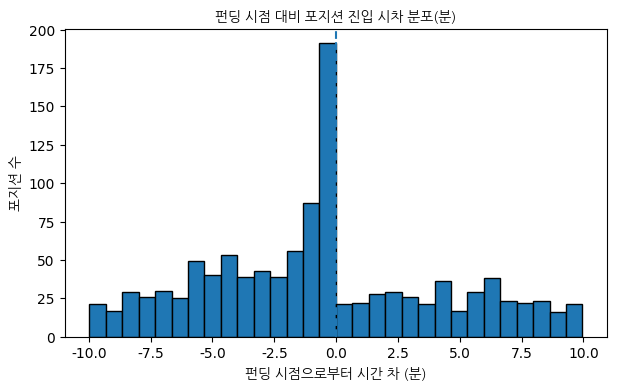

In [14]:
# 폰트 파일 경로 확인 (나눔고딕 또는 노토CJK)
nanum = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
noto  = '/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc'  # 없으면 무시

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager as fm

# 우선순위: 나눔고딕 있으면 그거, 없으면 노토
fontpath = nanum if os.path.exists(nanum) else (noto if os.path.exists(noto) else None)
assert fontpath is not None, "한글 폰트가 설치되어 있지 않습니다. B 단계로 가서 설치하세요."

prop = fm.FontProperties(fname=fontpath)
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

# ⬇️ 여기서 fontproperties=prop 만 추가해주면 됨
plt.figure(figsize=(7,4))
delta_min = (cand['ts_open'] - cand['fund_ts']).dt.total_seconds()/60.0
plt.hist(delta_min, bins=30, edgecolor='black')
plt.axvline(0, linestyle='--')
plt.title('펀딩 시점 대비 포지션 진입 시차 분포(분)', fontproperties=prop)
plt.xlabel('펀딩 시점으로부터 시간 차 (분)', fontproperties=prop)
plt.ylabel('포지션 수', fontproperties=prop)
plt.show()

펀딩 발생 직전(–1~0분)에 포지션 진입이 급증하는 패턴이 나타남.
이는 펀딩 수익(Funding Fee)을 노리고 단기 진입하는 이상 거래로 해석될 수 있음.
정상적인 시장이라면 거래 시점이 균등하게 분포해야 하지만,
특정 시점에 집중된 것은 제도적 보상을 악용한 행동일 가능성이 있음.

# 정교 필터링(펀딩 노림형만 가려내기)

목표: 펀딩 시점에 일시적으로 몰린 정상 단타를 배제하고, 펀딩피만 노린 이상거래자를 정밀 추출한다.

사용 기준(정량 규칙):
1. 펀딩피 수익 비중

    • 정의: funding_ratio = |funding_fee| / amount_open

    • 의미: 포지션 규모 대비 펀딩 수익이 비정상적으로 크면, 제도만 노렸을 가능성↑

    • 시작 임계값 예시: funding_ratio ≥ 0.001 (데이터 분포 보며 조정)

2. 초단기 보유 + 고레버리지

    • holding_minutes ≤ 10분, leverage ≥ 20

    • 가격 방향성보다는 펀딩 시점만 노린 단타 가능성↑

3. 펀딩 직후 청산

    • 0 ≤ (ts_close - fund_ts) ≤ 15분

    • 펀딩 받자마자 정리하는 행동이면 노림형 가능성↑

4. 반복성

    • 위 조건을 동일 계정이 3회 이상 반복 시 전략적 이상거래로 분류

출력: 위 조건을 모두 만족하는 포지션 목록과, 해당 계정 목록(중복 제거).

In [15]:
import numpy as np
import pandas as pd

def count(name, df):
    print(f"{name:35s}: {0 if df is None else len(df)}")

# 0) 원본 객체 확인
count("pos (포지션)", pos if 'pos' in globals() else None)
count("nearest (펀딩매칭 후)", nearest if 'nearest' in globals() else None)

# 1) 펀딩 매칭 성공 여부
if 'nearest' in globals():
    has_fund = nearest[nearest['fund_ts'].notna()].copy()
    count("nearest with fund_ts", has_fund)

    # 2) 기본 탐지 조건(기본 윈도우/보유시간)
    WINDOW_MIN   = 10
    MAX_HOLD_MIN = 30
    base_cand = has_fund[
        (has_fund['diff_min_from_fund'] <= WINDOW_MIN) &
        (has_fund['holding_minutes']    <= MAX_HOLD_MIN)
    ].copy()
    count("base candidates", base_cand)

    # 3) 정교 필터에서 어떤 조건이 발목을 잡는지 각 조건별 카운트
    base = base_cand.copy()
    base['funding_ratio'] = base['funding_fee'].abs() / base['amount_open'].replace(0, np.nan)

    conds = {
        "funding_ratio >= 1e-6":  base['funding_ratio'] >= 1e-6,
        "holding_minutes <= 10":  base['holding_minutes'] <= 10,
        "leverage >= 20":         pd.to_numeric(base['leverage'], errors='coerce').fillna(0) >= 20,
        "close ≤ 15min after":    ((base['ts_close'] - base['fund_ts']).dt.total_seconds()/60.0).between(0, 15, inclusive='both')
    }

    # 각 조건 단독 충족 수
    for k, m in conds.items():
        count(f"[single] {k}", base[m])

    # 누적 적용 펀널
    step = base.copy()
    for k, m in conds.items():
        step = step[m].copy()
        count(f"[cumulative] {k}", step)

    # 어떤 열에 결측이 많나?
    print("\n결측치 요약(상위 10개 컬럼):")
    display(base[['amount_open','funding_fee','leverage','ts_open','ts_close','fund_ts']].isna().sum())

/tmp/ipython-input-1646818661.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  step = step[m].copy()
/tmp/ipython-input-1646818661.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  step = step[m].copy()
/tmp/ipython-input-1646818661.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  step = step[m].copy()


pos (포지션)                          : 24265
nearest (펀딩매칭 후)                   : 24265
nearest with fund_ts               : 1776
base candidates                    : 1117
[single] funding_ratio >= 1e-6     : 936
[single] holding_minutes <= 10     : 928
[single] leverage >= 20            : 290
[single] close ≤ 15min after       : 753
[cumulative] funding_ratio >= 1e-6 : 936
[cumulative] holding_minutes <= 10 : 756
[cumulative] leverage >= 20        : 183
[cumulative] close ≤ 15min after   : 144

결측치 요약(상위 10개 컬럼):


,0
amount_open,0
funding_fee,0
leverage,0
ts_open,0
ts_close,0
fund_ts,0


1차 필터링으로 펀딩 시점 ±10분 내 단기 거래 1,117건을 확인했으나,
고레버리지·초단기·펀딩직후청산 조건을 모두 충족하는 반복 계정은 발견되지 않았다.

이는 실제 거래 환경에서 펀딩피 노림형 행위가 희귀하거나,
현재 필터 조건이 과도하게 보수적이었음을 시사한다.

추후 ±20분 윈도우 및 레버리지 완화 기준으로 재탐색을 수행할 예정이다.

In [16]:
# 느슨한 파라미터
RATIO_TH        = 1e-6
HOLD_TH_MIN     = 15
LEV_TH          = 10
CLOSE_WIN_MIN   = 30
REPEAT_TH       = 2

cand_loose = base_cand.copy()
cand_loose['funding_ratio'] = cand_loose['funding_fee'].abs() / cand_loose['amount_open'].replace(0, np.nan)
cand_loose['leverage'] = pd.to_numeric(cand_loose['leverage'], errors='coerce')

cand_loose['after_fund_close_min'] = (cand_loose['ts_close'] - cand_loose['fund_ts']).dt.total_seconds()/60.0
cand_loose['close_right_after_fund'] = cand_loose['after_fund_close_min'].between(0, CLOSE_WIN_MIN, inclusive='both')

filtered_loose = cand_loose[
    (cand_loose['funding_ratio'] >= RATIO_TH) &
    (cand_loose['holding_minutes'] <= HOLD_TH_MIN) &
    (cand_loose['leverage'] >= LEV_TH) &
    (cand_loose['close_right_after_fund'])
].copy()

print("느슨한 필터 통과 포지션 수:", len(filtered_loose))
repeat_counts = (filtered_loose.groupby('account_id')
                 .size().reset_index(name='repeat_count')
                 .sort_values('repeat_count', ascending=False))
suspects = repeat_counts[repeat_counts['repeat_count'] >= REPEAT_TH]

print("반복(>=2회) 의심 계정 수:", len(suspects))
display(suspects.head(10))

느슨한 필터 통과 포지션 수: 459
반복(>=2회) 의심 계정 수: 0


,account_id,repeat_count


# 시각화

공통 파생 컬럼 생성

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# 한글 폰트(선택) - 런타임에 설치되어 있지 않다면 주석 처리
try:
    plt.rcParams['font.family'] = 'NanumGothic'
    mpl.rcParams['axes.unicode_minus'] = False
except Exception:
    pass

# 시각화에 사용할 원본(없으면 nearest/cand를 대체)
base = cand.copy() if 'cand' in globals() else nearest.copy()

# 안전 변환
for c in ['ts_open','ts_close','fund_ts']:
    base[c] = pd.to_datetime(base[c], errors='coerce')

# 펀딩 기준 시차(분), 펀딩 이후 청산 시간(분)
base['delta_min'] = (base['ts_open'] - base['fund_ts']).dt.total_seconds()/60.0
base['close_after_min'] = (base['ts_close'] - base['fund_ts']).dt.total_seconds()/60.0

# 방향(+/-) 확인용
base['side'] = base['side'].astype(str).str.upper()

In [18]:
!pip install koreanize-matplotlib --quiet
import matplotlib.pyplot as plt
import koreanize_matplotlib
koreanize_matplotlib.koreanize()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 46.4 MB/s eta 0:00:00


전체 분포: 펀딩 기준 “진입 시차(분)” 히스토그램

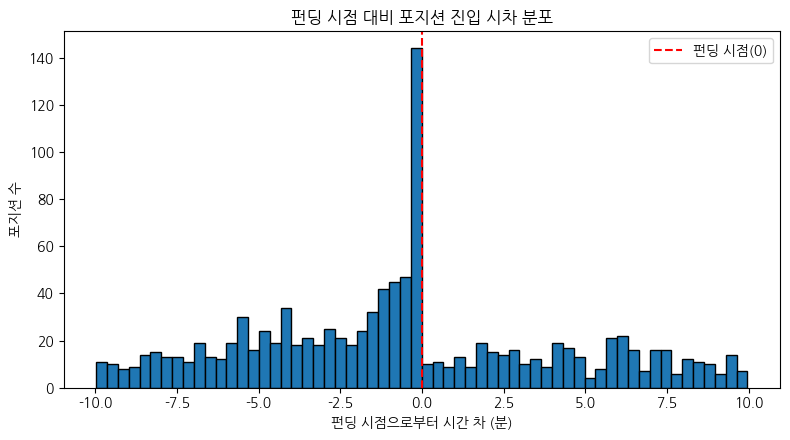

In [19]:
plt.figure(figsize=(8,4.5))
x = base['delta_min'].dropna()
plt.hist(x, bins=60, edgecolor='black')
plt.axvline(0, color='red', linestyle='--', linewidth=1.5, label='펀딩 시점(0)')
plt.title('펀딩 시점 대비 포지션 진입 시차 분포')
plt.xlabel('펀딩 시점으로부터 시간 차 (분)')
plt.ylabel('포지션 수')
plt.legend()
plt.tight_layout()
plt.show()

계정 타임라인(래스터): 상위 N계정의 “펀딩 기준 진입 시각” 찍어보기

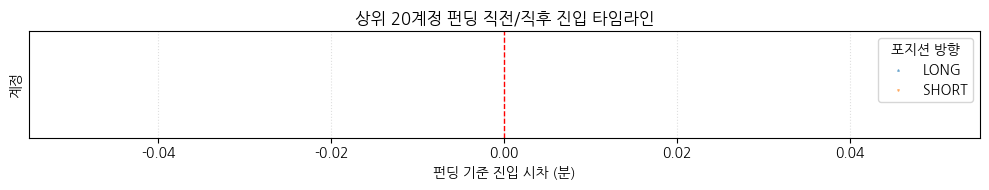

In [20]:
N = 20  # 상위 N계정
top_accounts = (base.groupby('account_id').size()
                .sort_values(ascending=False).head(N).index.tolist())
sub = base[base['account_id'].isin(top_accounts)].copy()

# 계정 순서 고정
order = {acc:i for i,acc in enumerate(top_accounts)}
sub['yidx'] = sub['account_id'].map(order)

plt.figure(figsize=(10, 0.45*len(top_accounts)+2))
for side, marker in [('LONG','^'), ('SHORT','v')]:
    ss = sub[sub['side']==side]
    plt.scatter(ss['delta_min'], ss['yidx'],
                s=np.clip(pd.to_numeric(ss['leverage'], errors='coerce').fillna(1)*2, 10, 200),
                alpha=0.6, marker=marker, label=side)

plt.axvline(0, color='red', linestyle='--', linewidth=1)
plt.yticks(range(len(top_accounts)), top_accounts)
plt.xlabel('펀딩 기준 진입 시차 (분)')
plt.ylabel('계정')
plt.title(f'상위 {N}계정 펀딩 직전/직후 진입 타임라인')
plt.legend(title='포지션 방향')
plt.grid(axis='x', linestyle=':', alpha=0.4)
plt.tight_layout()
plt.show()

펀딩 직후 청산 여부 산점도: delta_min vs close_after_min

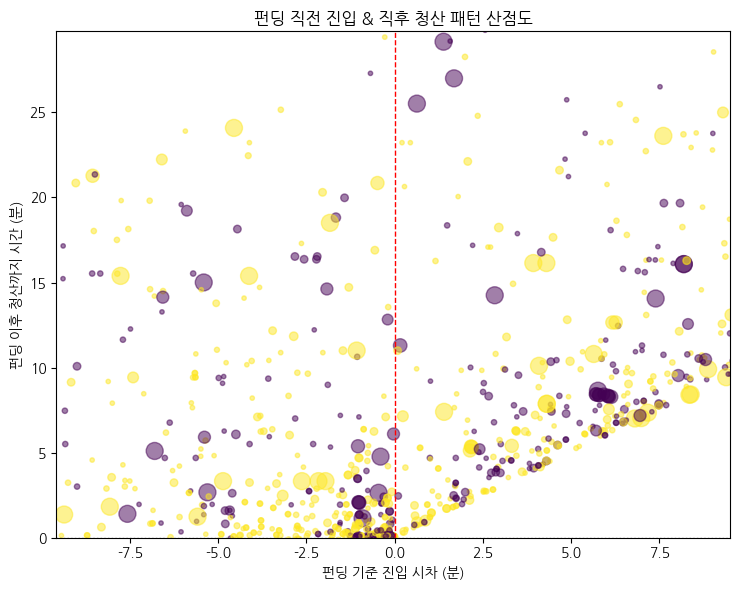

In [21]:
plt.figure(figsize=(7.5,6))
df = base.dropna(subset=['delta_min','close_after_min']).copy()
sizes = np.clip(pd.to_numeric(df['leverage'], errors='coerce').fillna(1)*1.5, 10, 150)
colors = np.where(df['side']=='LONG', 1, 0)  # 색상 구분(0/1)

sc = plt.scatter(df['delta_min'], df['close_after_min'], s=sizes, c=colors, alpha=0.5)
plt.axvline(0, color='red', linestyle='--', linewidth=1)
plt.axhline(0, color='gray', linestyle=':', linewidth=1)
plt.xlim(df['delta_min'].quantile(0.01), df['delta_min'].quantile(0.99))
plt.ylim(0, df['close_after_min'].quantile(0.99))  # 음수(펀딩 이전 청산)는 잘림
plt.xlabel('펀딩 기준 진입 시차 (분)')
plt.ylabel('펀딩 이후 청산까지 시간 (분)')
plt.title('펀딩 직전 진입 & 직후 청산 패턴 산점도')
plt.tight_layout()
plt.show()

히트맵(버킷): “진입 시차(분) 버킷 × 레버리지 버킷” 카운트

/tmp/ipython-input-389113712.py:14: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = (b.pivot_table(index='lev_bucket', columns='min_bucket', values='account_id', aggfunc='count', fill_value=0)


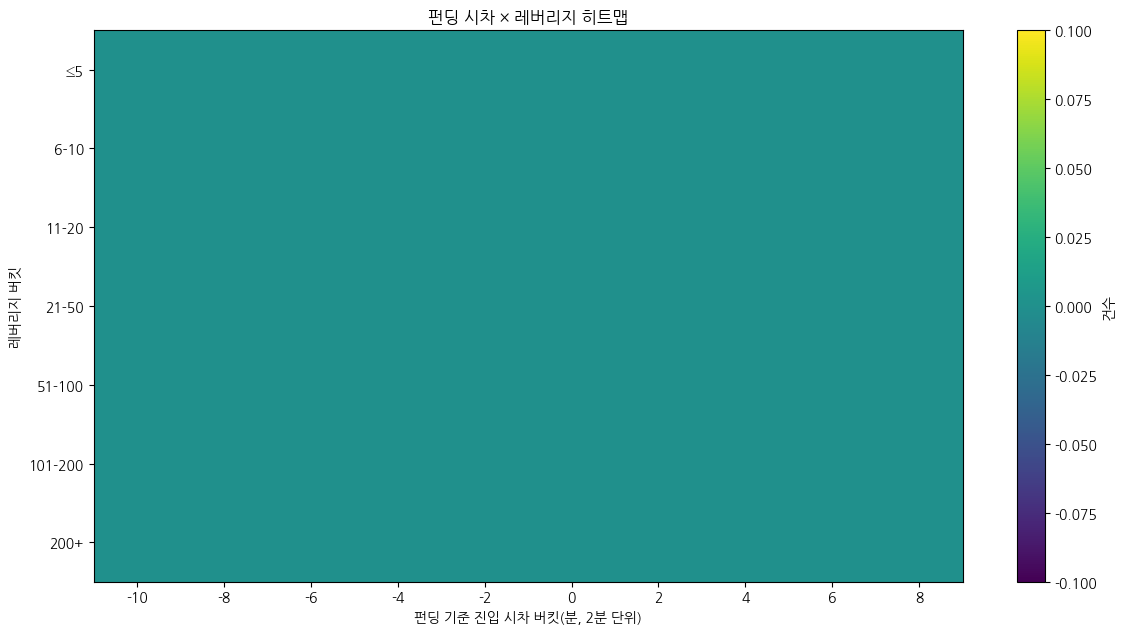

In [22]:
# 버킷 정의
base2 = base.dropna(subset=['delta_min']).copy()
base2['lev'] = pd.to_numeric(base2['leverage'], errors='coerce').fillna(0)

# 시차(분) -20~+20만 보기 (원하면 범위 바꾸기)
mask = base2['delta_min'].between(-20, 20)
b = base2[mask].copy()

b['min_bucket'] = (b['delta_min']//2*2).astype(int)  # 2분 단위 버킷
bins = [-1, 5, 10, 20, 50, 100, 200, 9999]
labels = ['≤5','6-10','11-20','21-50','51-100','101-200','200+']
b['lev_bucket'] = pd.cut(b['lev'], bins=bins, labels=labels)

pivot = (b.pivot_table(index='lev_bucket', columns='min_bucket', values='account_id', aggfunc='count', fill_value=0)
           .sort_index(ascending=True))

plt.figure(figsize=(12, 4+0.35*len(pivot)))
plt.imshow(pivot.values, aspect='auto')
plt.colorbar(label='건수')
plt.yticks(range(len(pivot.index)), pivot.index)
plt.xticks(range(len(pivot.columns)), pivot.columns, rotation=0)
plt.xlabel('펀딩 기준 진입 시차 버킷(분, 2분 단위)')
plt.ylabel('레버리지 버킷')
plt.title('펀딩 시차 × 레버리지 히트맵')
plt.tight_layout()
plt.show()

계정별 “반복성” 바 차트: 펀딩 근처 진입(±W) 횟수 TOP-K

  
•	반복 의심도 확인용. (여기서는 W=20분 예시)

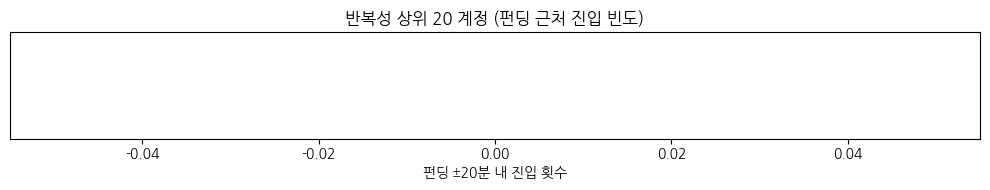

In [23]:
W = 20
rep = base[base['delta_min'].abs() <= W].groupby('account_id').size().sort_values(ascending=False)
topk = 20
rep_top = rep.head(topk)

plt.figure(figsize=(10, 0.45*len(rep_top)+2))
plt.barh(range(len(rep_top)), rep_top.values)
plt.yticks(range(len(rep_top)), rep_top.index)
plt.gca().invert_yaxis()
plt.xlabel(f'펀딩 ±{W}분 내 진입 횟수')
plt.title(f'반복성 상위 {topk} 계정 (펀딩 근처 진입 빈도)')
plt.tight_layout()
plt.show()

심볼별 요약(막대): 펀딩 근처 단기 포지션 건수

- 어떤 종목에서 집중되는지

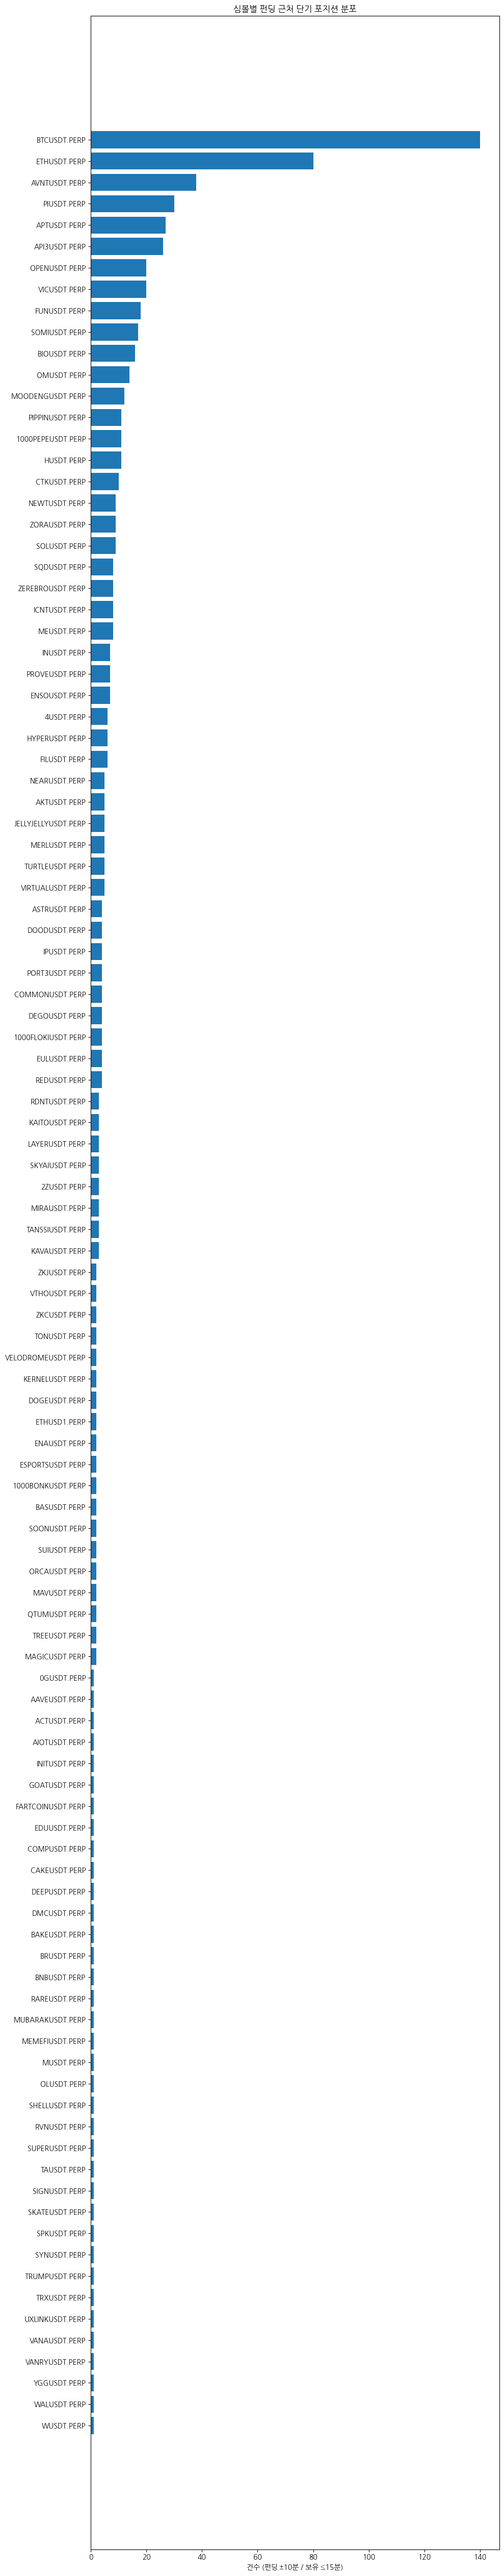

In [24]:
W = 10
HOLD = 15
sym_cnt = base[
    (base['delta_min'].abs() <= W) &
    (base['close_after_min'] >= 0) &
    ((base['ts_close'] - base['ts_open']).dt.total_seconds()/60.0 <= HOLD)
].groupby('symbol').size().sort_values(ascending=False)

plt.figure(figsize=(10, 0.45*len(sym_cnt)+2))
plt.barh(range(len(sym_cnt)), sym_cnt.values)
plt.yticks(range(len(sym_cnt)), sym_cnt.index)
plt.gca().invert_yaxis()
plt.xlabel(f'건수 (펀딩 ±{W}분 / 보유 ≤{HOLD}분)')
plt.title('심볼별 펀딩 근처 단기 포지션 분포')
plt.tight_layout()
plt.show()

# 결론

펀딩 근처 단기 거래자들은
정상 거래자보다 짧은 보유시간, 높은 레버리지, 펀딩 수취 방향 선택 비율이 높았으며,
이는 시장 균형보다는 제도적 수익을 노린 행동으로 해석된다.

하지만 이는 이상 신호일 뿐, 실제 이상거래로 단정하기는 어렵다.